In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
link_url = https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset/

In [2]:
path = '/content/heart.csv'

In [3]:
# Para trabalhar com dados em tabelas
import pandas as pd

# Para trabalhar com dados do OpenML
from sklearn.datasets import fetch_openml

# Para trabalhar com gráficos
import seaborn as sns
import matplotlib.pyplot as plt

In [106]:
dados = pd.read_csv(path)

In [6]:
dados.head


<bound method NDFrame.head of      age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  outp

# ANÁLISE ESTÁTISTICA EXPLORATÓRIA

In [10]:
dados["age"].mean(), dados["sex"].mean()

(54.366336633663366, 0.6831683168316832)

In [11]:
dados["age"].median(), dados["sex"].median()

(55.0, 1.0)

In [12]:
from sklearn.model_selection import train_test_split

# TREINO DO MODELO

In [27]:
# Escolhendo as colunas preditivas e alvo
x = dados.drop(columns = 'output') # Somente Comprimento do
                                    # Abdômen e Comprimento das Antenas
y = dados['output']                # Classe alvo

# Dividindo conjunto de treinamento e conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.2, random_state = 42)

In [28]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: output, Length: 61, dtype: int64

In [29]:
x_train.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


In [30]:
y_train.head(5)

132    1
202    0
196    0
75     1
176    0
Name: output, dtype: int64

In [31]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [32]:
lda = LinearDiscriminantAnalysis()  # Criamos o objeto do classificador (não mudamos nenhum hiperpârametro)

lda.fit(x_train,y_train) # Treinamos o classificador passando apenas o conjunto de dados de treinamento

LinearDiscriminantAnalysis()

In [33]:
# Perceba que estamos passando apenas o x de teste,
# afinal o algoritmo é que nos dira qual é o y
y_predicoes = lda.predict(x_test)

In [34]:
y_predicoes

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay#, plot_confusion_matrix
from sklearn.metrics import (f1_score
                             , accuracy_score
                             , precision_score
                             , recall_score
                             , classification_report)

In [38]:
matriz_confusao = confusion_matrix(y_true = y_test,
                                   y_pred = y_predicoes,
                                   labels=[0, 1])

<Figure size 1500x500 with 0 Axes>

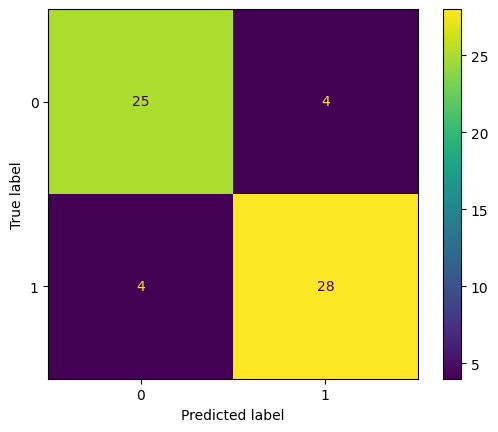

In [39]:
# plotando uma figura com a matriz de confusao
figure = plt.figure(figsize=(15, 5))
disp = ConfusionMatrixDisplay(
    confusion_matrix = matriz_confusao
    , display_labels=[0, 1])

disp.plot(values_format='d')

In [40]:
accuracy_score(y_true = y_test, y_pred = y_predicoes)

0.8688524590163934

In [41]:
precision_score(y_true = y_test,
         y_pred = y_predicoes,
         pos_label= 1)

0.875

In [42]:
recall_score(y_true = y_test,
         y_pred = y_predicoes,
         pos_label=1 )

0.875

In [43]:
f1_score(y_true = y_test,
         y_pred = y_predicoes,
         pos_label= 1)

0.875

In [44]:
# Metricas de precisão, revocação, f1-score e acurácia.
print(classification_report(y_test, y_predicoes))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



# 5 GRÁFICOS DISTINTOS


Text(0, 0.5, 'Pressão Arterial')

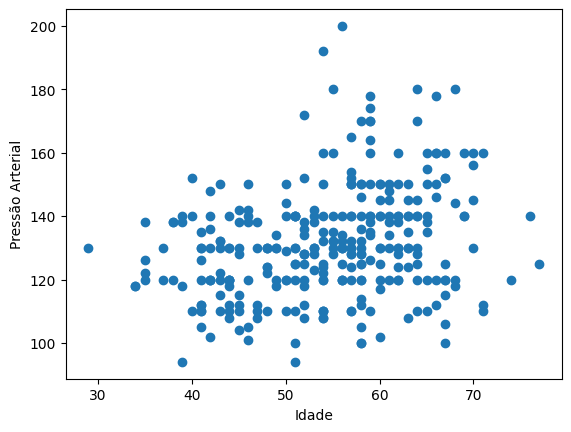

In [114]:
plt.scatter(x = dados['age'], y = dados['trtbps'])
plt.xlabel('Idade')
plt.ylabel('Pressão Arterial')

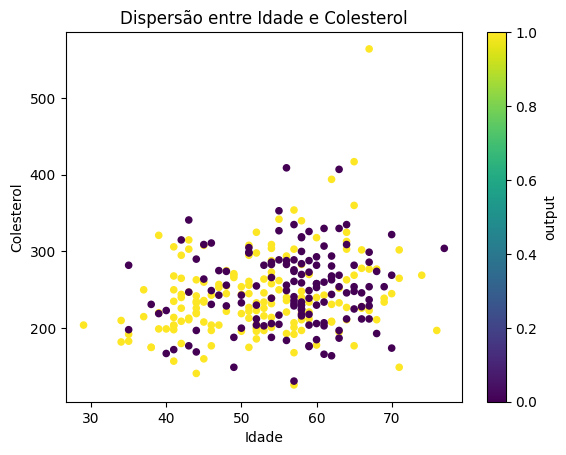

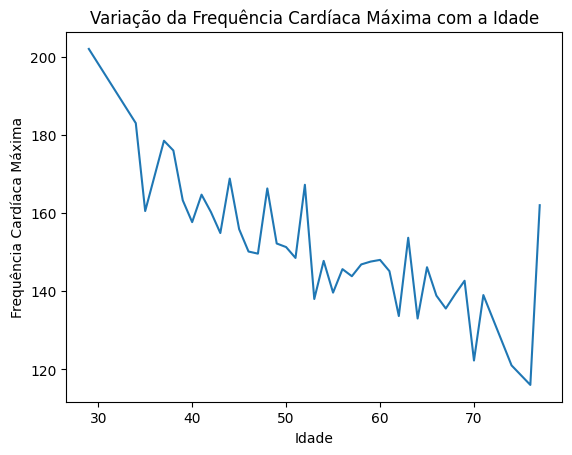

In [110]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregando o DataFrame a partir de um arquivo CSV
path = '/content/heart.csv'  # Certifique-se de fornecer o caminho correto para o seu arquivo CSV
df = pd.read_csv(path)

# Gráfico de dispersão entre idade (age) e colesterol (chol)
df.plot.scatter(x='age', y='chol', c='output', colormap='viridis')
plt.title('Dispersão entre Idade e Colesterol')
plt.xlabel('Idade')
plt.ylabel('Colesterol')
plt.show()


# Gráfico de linhas para visualizar a variação da frequência cardíaca máxima (thalachh) com a idade
df.groupby('age')['thalachh'].mean().plot(kind='line')
plt.title('Variação da Frequência Cardíaca Máxima com a Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência Cardíaca Máxima')
plt.show()



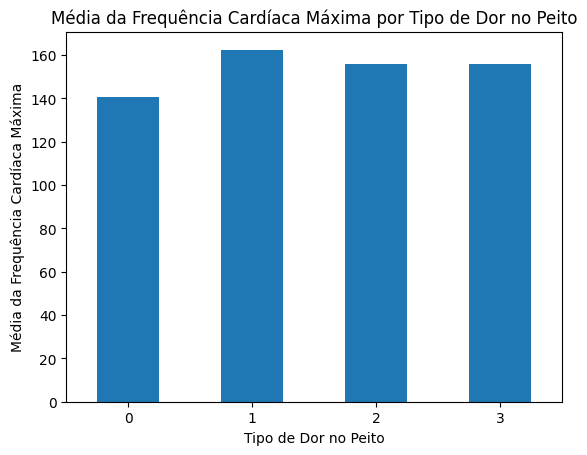

In [113]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregando o DataFrame a partir de um arquivo CSV
path = '/content/heart.csv'  # Certifique-se de fornecer o caminho correto para o seu arquivo CSV
df = pd.read_csv(path)

# Gráfico de barras para mostrar a média da frequência cardíaca máxima (thalachh) por tipo de dor no peito (cp)
df.groupby('cp')['thalachh'].mean().plot(kind='bar', rot=0)
plt.title('Média da Frequência Cardíaca Máxima por Tipo de Dor no Peito')
plt.xlabel('Tipo de Dor no Peito')
plt.ylabel('Média da Frequência Cardíaca Máxima')
plt.show()




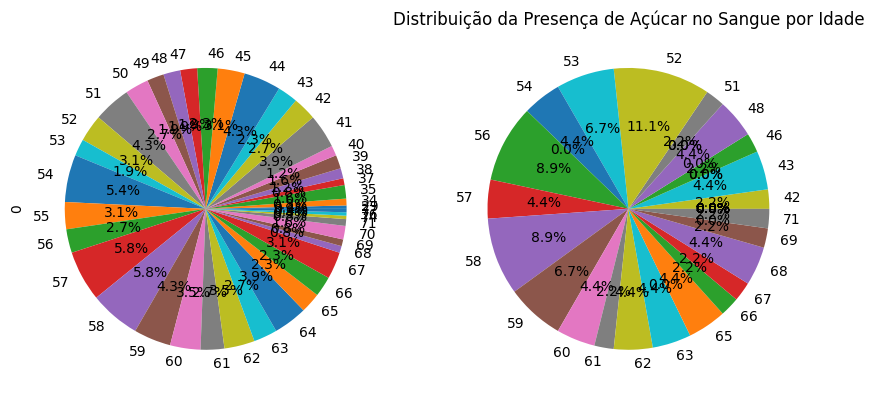

In [112]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregando o DataFrame a partir de um arquivo CSV
path = '/content/heart.csv'  # Certifique-se de fornecer o caminho correto para o seu arquivo CSV
df = pd.read_csv(path)

# Criando um DataFrame auxiliar para contar a quantidade de casos de presença de açúcar no sangue por idade
df_aux = pd.crosstab(df['age'], df['fbs'])

# Gráfico de pizza para mostrar a distribuição da presença de açúcar no sangue por idade
df_aux.plot.pie(subplots=True, autopct='%1.1f%%', figsize=(10, 5), legend=False)
plt.title('Distribuição da Presença de Açúcar no Sangue por Idade')
plt.ylabel('')
plt.show()
